## __Problem Statement__:

#### The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. 
#### Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output)
#### variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

#### This dataset can be viewed as classification task.
#### The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones).
#### Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [4]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [27]:
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv'

In [28]:
## loading the data 
data = pd.read_csv(url)

In [29]:
## This code help to display all the columns

pd.options.display.max_columns = None

In [30]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
data.shape

(1599, 12)

### The above the structure of our data which is: number of  rows = 1599 and number of columns = 12

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### this data.info() show that our data contains float64 and int64  which means only __numerical values__ 

In [31]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### The describe method show the statistics values of each column of our dataset

In [33]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [32]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

### Let's set an arbitrary cutoff for our dependent variable (wine quality) at e.g. 7 
### or higher getting classified as 'good/1' and the remainder as 'not good/0'.
### doing that it will help us to deal with only two classes

In [39]:
data['quality'] = data['quality'].replace({3:0,4:0,5:0,6:0,7:1,8:1})

In [40]:
## Let's verify it.

data.quality.unique()

array([0, 1])

## Now our problem is a  Binary classification problem.

0    1382
1     217
Name: quality, dtype: int64

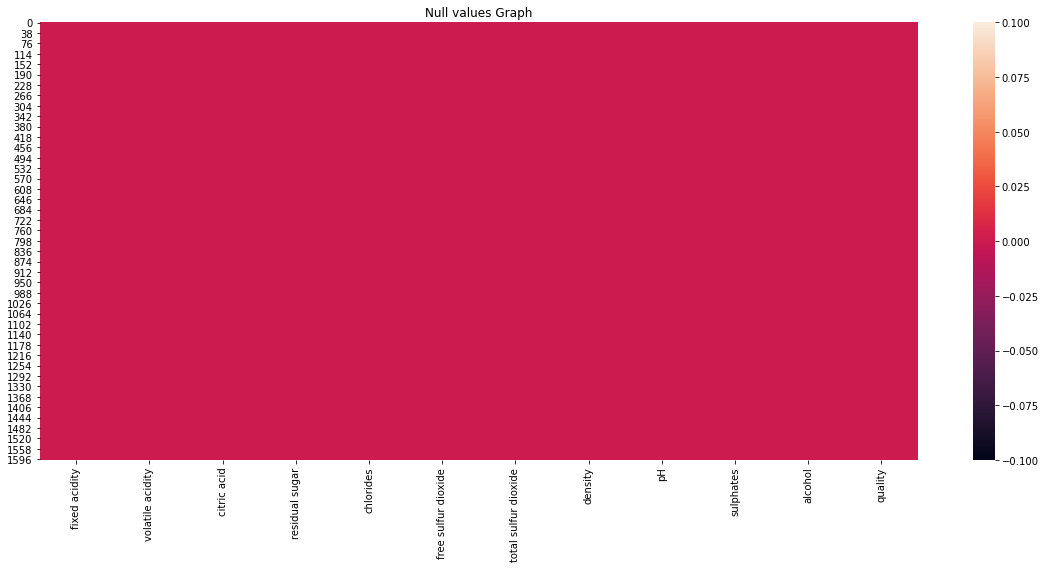

In [42]:
## let's plot it see , how it there is null values or not

plt.figure(figsize=(16,8))
sns.heatmap(data.isnull())
plt.title("Null values Graph")
plt.tight_layout()

In [43]:
## the above graph show there no missing values since it gives only red colors

In [44]:
data.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

### from this we can see that two classes are not in balance, we have unbalance between 0 and 1 

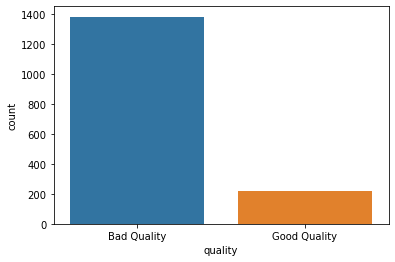

In [46]:
# let's plot it and see the  visualization of unbalance between 0 and 1

g = sns.countplot(data['quality'])
g.set_xticklabels(['Bad Quality','Good Quality'])
plt.show()

## Let's fixed first this problem of Unbalance data

In [47]:
## let's seperate the dataset into features and label

X = data.drop('quality',axis=1)
y = data.quality

In [48]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

### let's used the method of __Upsampling__ (Oversampling) since we have small dataset

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [108]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=355)

In [109]:
## let's concatinate back our x_train and y_train data

X_ = pd.concat([x_train, y_train],axis=1)

In [110]:
X_

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
709,9.7,0.31,0.47,1.6,0.062,13.0,33.0,0.99830,3.27,0.66,10.0,0
1236,7.8,0.55,0.00,1.7,0.070,7.0,17.0,0.99659,3.26,0.64,9.4,0
1155,8.3,0.60,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,0
1239,6.5,0.67,0.00,4.3,0.057,11.0,20.0,0.99488,3.45,0.56,11.8,0
227,9.0,0.82,0.14,2.6,0.089,9.0,23.0,0.99840,3.39,0.63,9.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,7.5,0.63,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,0
1525,6.7,0.48,0.08,2.1,0.064,18.0,34.0,0.99552,3.33,0.64,9.7,0
1370,8.7,0.78,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,0
642,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,0


In [111]:
## let's check the count of each class in our label data (quality)

Bad_Quality = X_[X_.quality ==0]
Good_Quality = X_[X_.quality ==1]


In [112]:
Bad_Quality.shape

(1102, 12)

In [113]:
Good_Quality.shape

(177, 12)

### Now let's do the Upsampling of the munority class which is Good_Quality

In [114]:
## Upsampling of the munority
Good_Quality_up = resample(Good_Quality,
                          replace=True, # sample with replacement
                          n_samples=len(Bad_Quality),# match number in Bad_Quality
                          random_state=355) 
                          


In [115]:
Good_Quality_up.shape

(1102, 12)

### we can see that the both Good_Quality_up and Bad_Quality have the same shape.(1102, 12)

In [116]:
upsampled  = pd.concat([Bad_Quality, Good_Quality_up])

In [117]:
upsampled.quality.value_counts()

0    1102
1    1102
Name: quality, dtype: int64

In [118]:
upsampled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
709,9.7,0.31,0.47,1.6,0.062,13.0,33.0,0.99830,3.27,0.66,10.0,0
1236,7.8,0.55,0.00,1.7,0.070,7.0,17.0,0.99659,3.26,0.64,9.4,0
1155,8.3,0.60,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,0
1239,6.5,0.67,0.00,4.3,0.057,11.0,20.0,0.99488,3.45,0.56,11.8,0
227,9.0,0.82,0.14,2.6,0.089,9.0,23.0,0.99840,3.39,0.63,9.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,9.1,0.25,0.34,2.0,0.071,45.0,67.0,0.99769,3.44,0.86,10.2,1
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,1
903,6.8,0.59,0.06,6.0,0.060,11.0,18.0,0.99620,3.41,0.59,10.8,1
873,9.1,0.21,0.37,1.6,0.067,6.0,10.0,0.99552,3.23,0.58,11.1,1


In [134]:
## we can split the upsampled back x_train and y_train

x_train_up = upsampled.drop('quality',axis=1)
y_train_up = upsampled.quality

In [120]:

y_train_up

709     0
1236    0
1155    0
1239    0
227     0
       ..
1075    1
828     1
903     1
873     1
1323    1
Name: quality, Length: 2204, dtype: int64

## Before fit our data to the model ,let's see by visualize the relationship bw the features and the label

In [121]:
X.shape

(1599, 11)

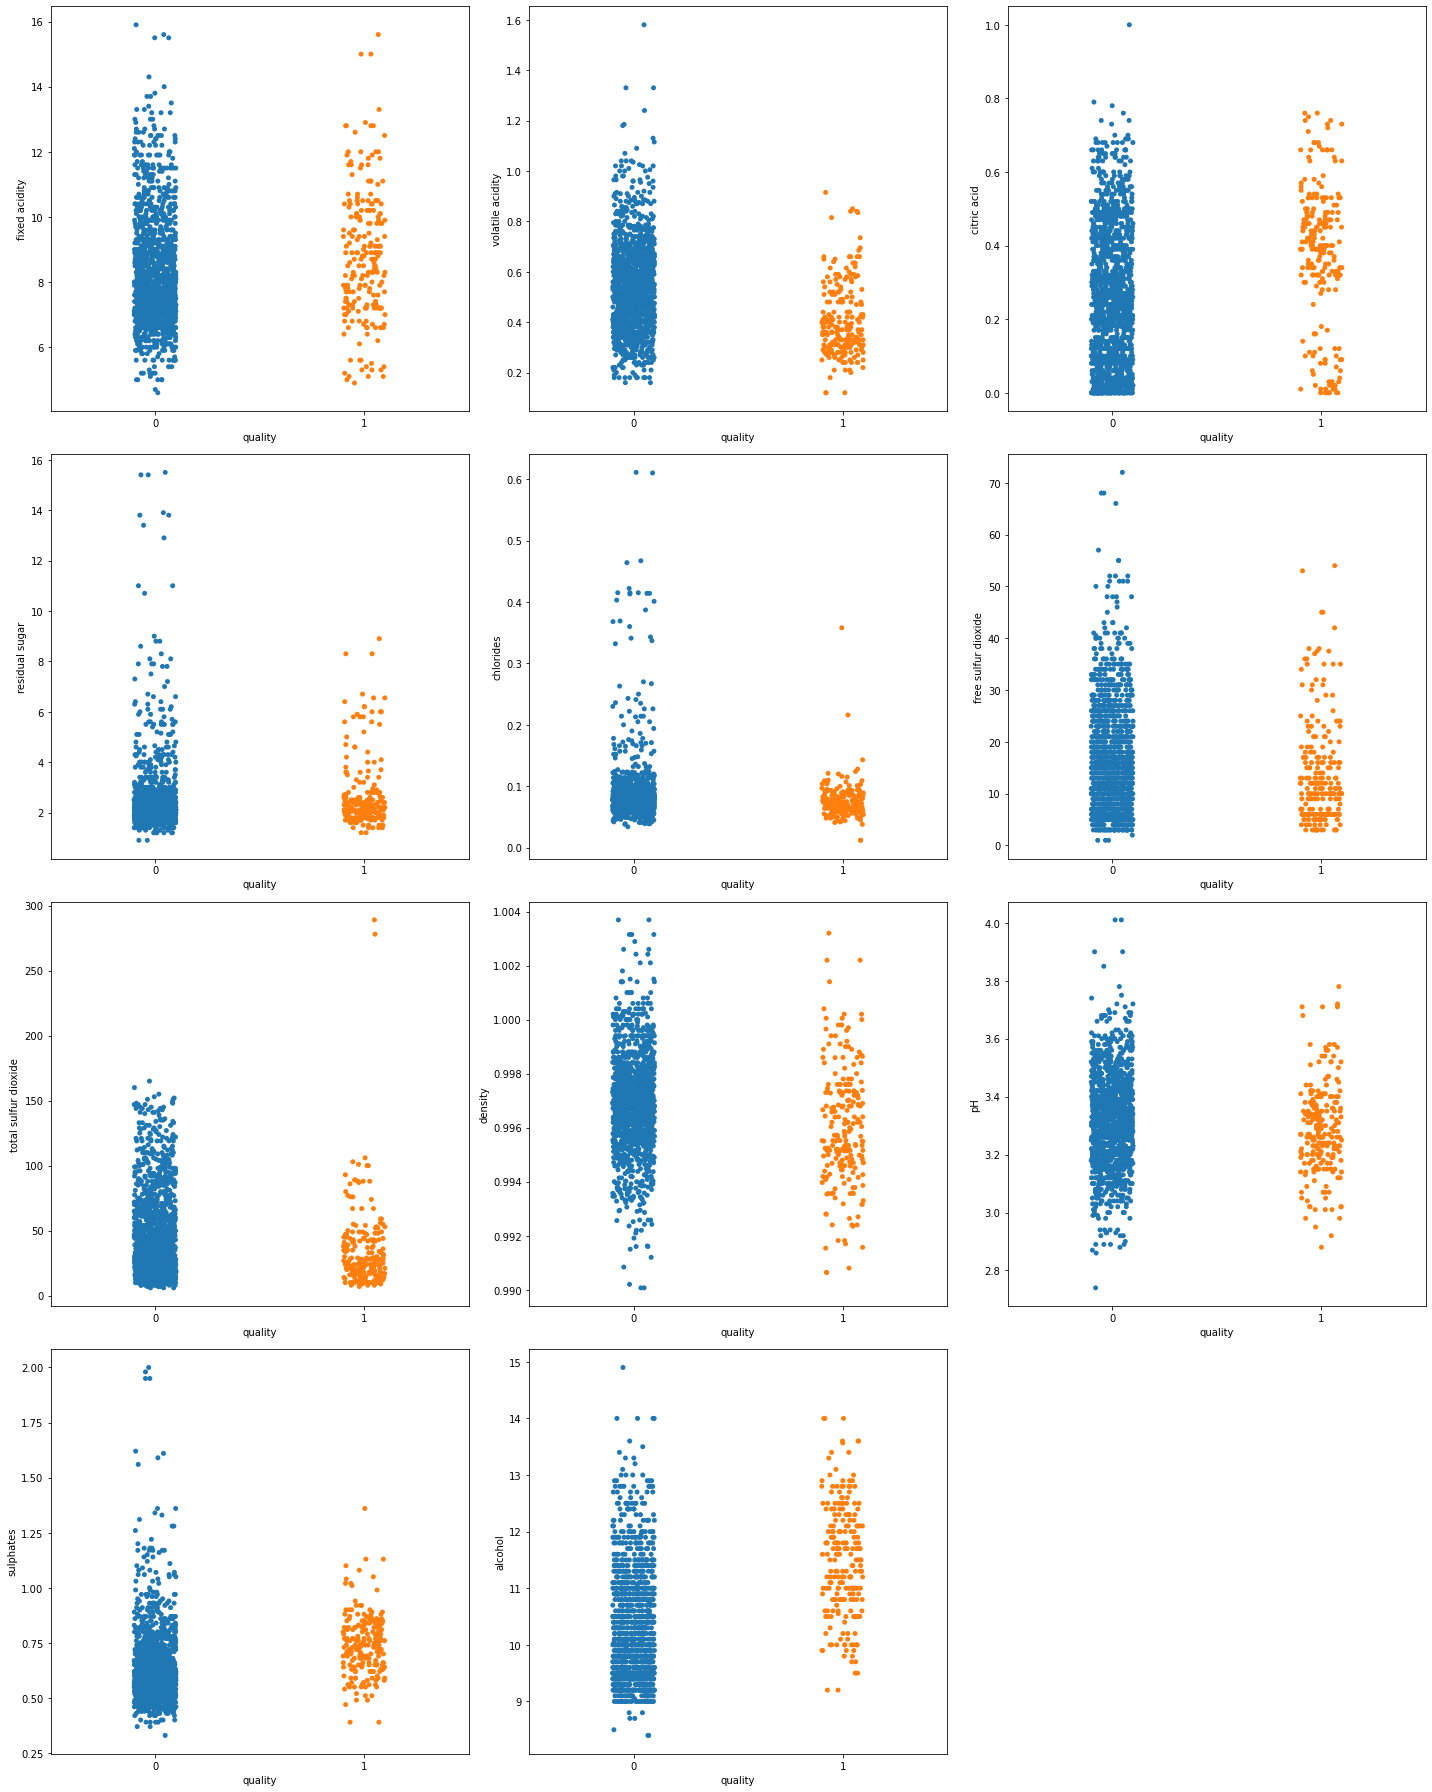

In [122]:
plt.figure(figsize=(20,25), facecolor='white')
plot_no = 1

for column in X:
    if plot_no <= 11:
        ax = plt.subplot(4,3,plot_no)
        sns.stripplot(y, X[column])
        
        
    plot_no+=1
plt.tight_layout()

#### From the above graphs, we can say that all the features are important..
### ---------------------

## We are to build our model using __DecisionTreeClassifier Algorithom__

In [123]:
## Let's import some libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score

In [124]:
## let's instantiate  it first

dtc = DecisionTreeClassifier()

In [125]:
dtc.fit(x_train_up, y_train_up)

DecisionTreeClassifier()

In [126]:
## let's check let train  data score
dtc.score(x_train_up, y_train_up)

1.0

In [127]:
## let's check the  accuracy of our classifiction tree

dtc.score(x_test, y_test)

0.884375

In [128]:
y_pred = dtc.predict(x_test)

In [129]:
from sklearn.metrics import classification_report

In [130]:
print(classification_report(y_test, y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       280
           1       0.53      0.72      0.61        40

    accuracy                           0.88       320
   macro avg       0.74      0.82      0.77       320
weighted avg       0.90      0.88      0.89       320



In [131]:
## let's check the confusion matrix
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[254,  26],
       [ 11,  29]])


## -----------------------------------------------------
## Let's go for __Hyperparamter turning__ and see if we can improve the accurancy of the model

#### Here we will using __GridSearchCV__ for best parameters

In [159]:
# We are tuning three hyperparamters right now,
# we are passing the different values for both paramters

grid_param = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,15,2),
    'min_samples_leaf':range(1,15,2),
    'min_samples_split':range(2,10,2)
}

In [160]:
grid_search = GridSearchCV(estimator=dtc,
                         param_grid=grid_param,
                         cv=5,
                         n_jobs=-1)

In [161]:
grid_search.fit(x_train_up, y_train_up)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 15, 2),
                         'min_samples_leaf': range(1, 15, 2),
                         'min_samples_split': range(2, 10, 2)})

In [162]:
## Let's the the best parameters

grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [163]:
dtc_ = DecisionTreeClassifier(criterion='entropy',
                             max_depth =15,
                              min_samples_leaf= 1,
                              min_samples_split= 4)

In [164]:
dtc_.fit(x_train_up, y_train_up)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=4)

In [165]:
dtc_.score(x_test,y_test)

0.896875

In [166]:
y_pred_ = dtc_.predict(x_test)

In [167]:
print(classification_report(y_test, y_pred_,digits=2))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       280
           1       0.57      0.68      0.62        40

    accuracy                           0.90       320
   macro avg       0.76      0.80      0.78       320
weighted avg       0.91      0.90      0.90       320



In [168]:
## let's check the confusion matrix

cfm_ = confusion_matrix(y_test, y_pred_)
cfm_

array([[260,  20],
       [ 13,  27]])

In [169]:
## let's see the Accuracy of the model
accuracy_score(y_test, y_pred_)


0.896875

## I have build the model using DecisionTreeClassifier and I got: 
## __accuracy  of 89%__ after Hyperparamter tuning

### ---------------------------------------
## Let's visualize the result....

In [171]:
feature_name = list(X.columns)
class_name = list(y_train_up.unique())
print(feature_name)
print(class_name)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
[0, 1]


In [172]:
## Let's import some libraries
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus

In [173]:
# Creating a dot_file which store the tree structure

dot_data = export_graphviz(dtc_,
                          feature_names=feature_name,
                          rounded=True,
                          filled=True)

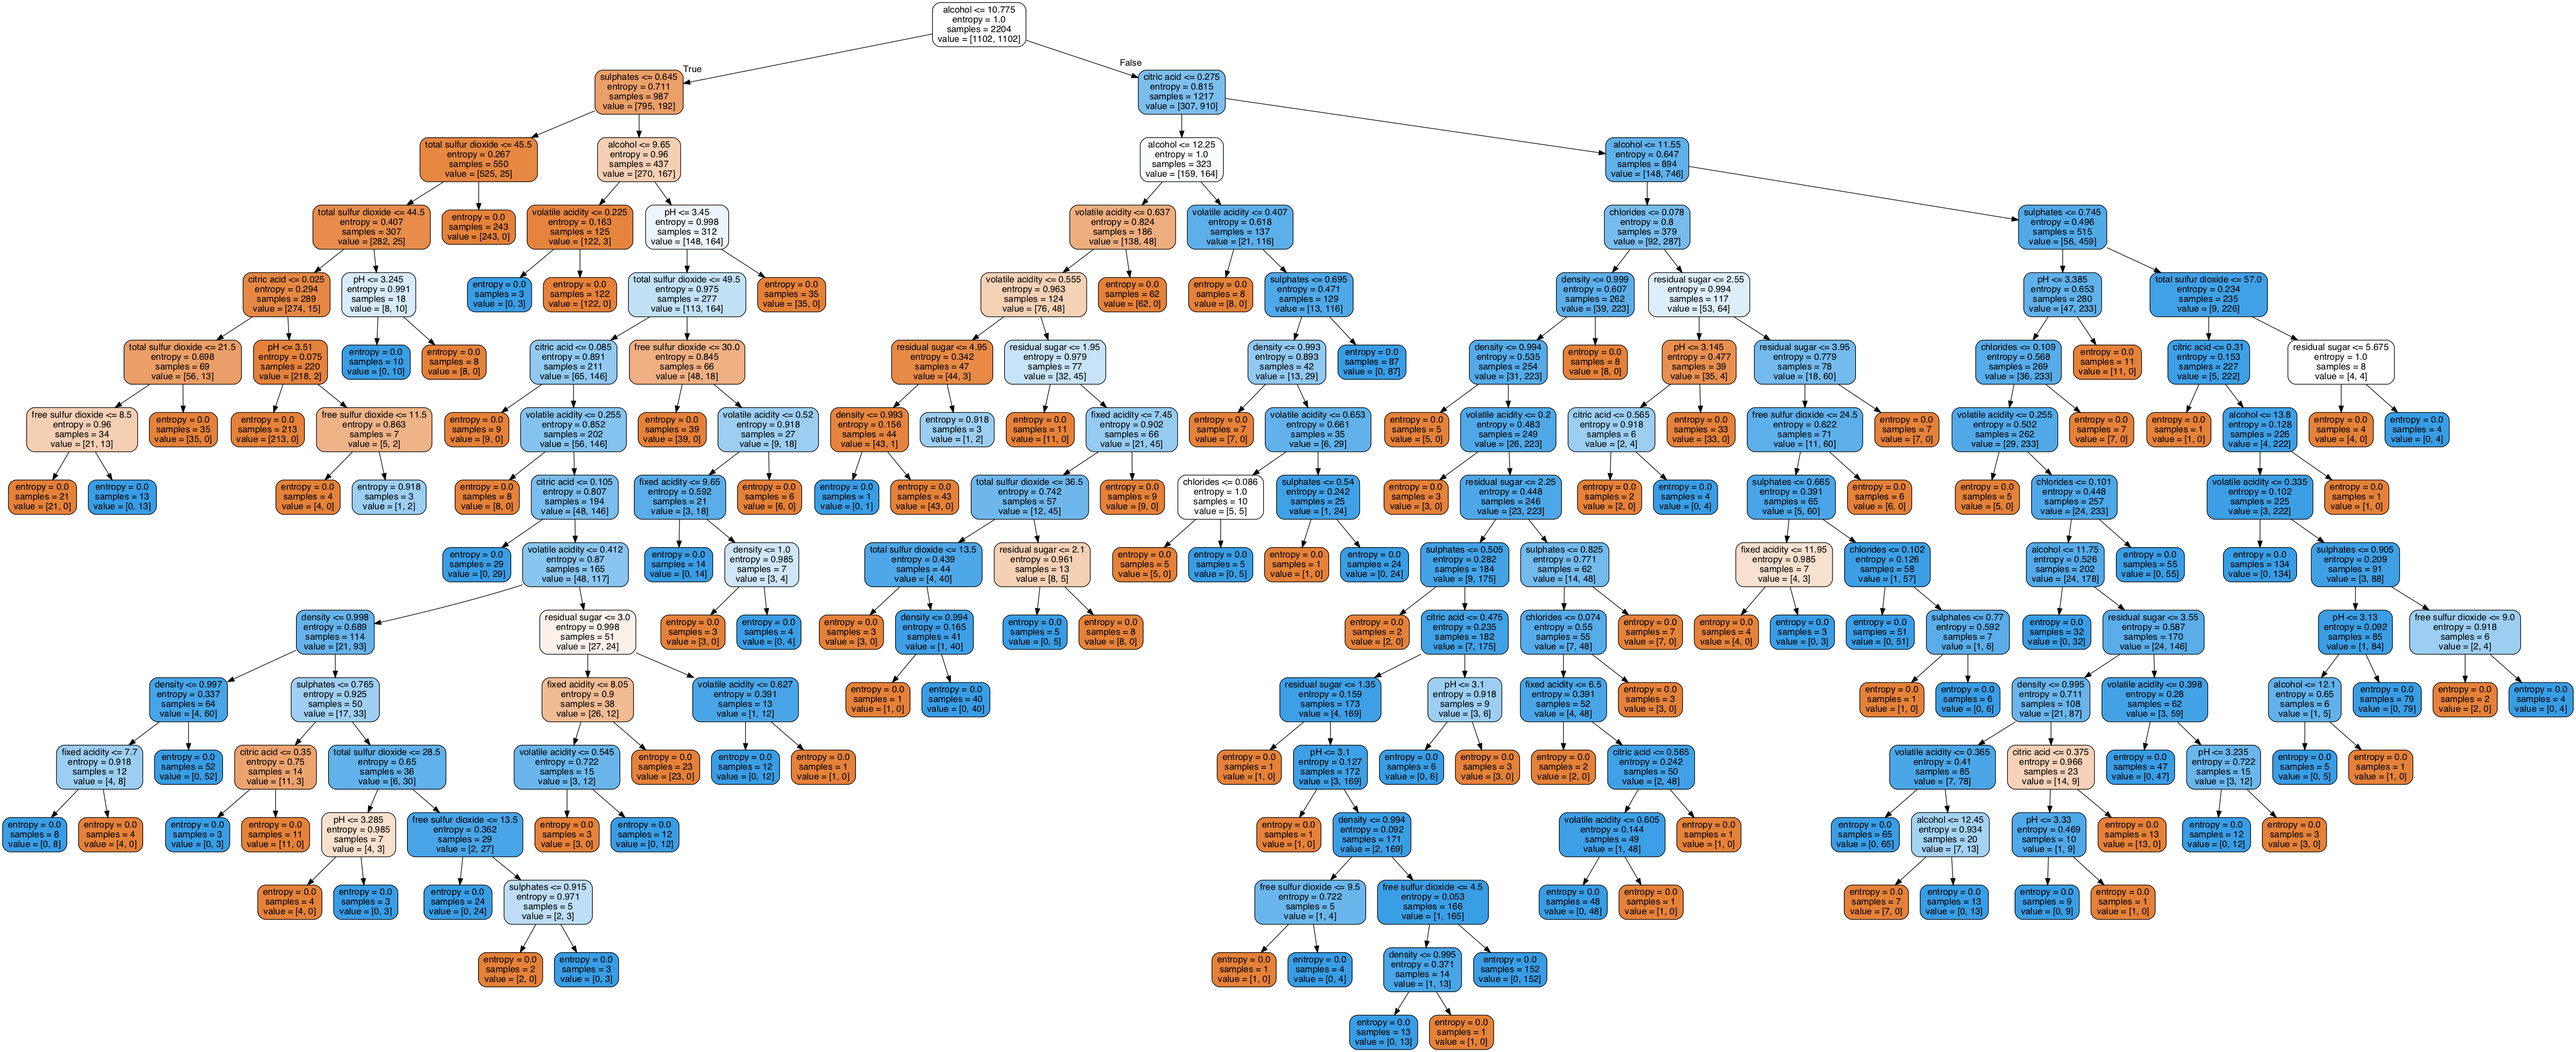

In [174]:
## Drawing the Graph

my_graph = pydotplus.graph_from_dot_data(dot_data)
my_graph.write_png('binary_tree.png')
Image(my_graph.create_png())



## __End of the first project. Thank you.__